# **Final Project**
# Part B, Task B1

IST340 Knowledge Discovery and Data Mining

Group 1: **Yuri Yu**, **Irma Covarrubias**, **Patrick Watkins**

## Load required libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Working directory

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# File path set and defined to Google Drive where Prepped and Tree Imputed file is stored
file_path = '/content/drive/MyDrive/IST340_Spring_Lab/'

## Load Prepped/Tree Imputed Dataset

In [76]:
df = pd.read_csv(file_path + 'TaskB.csv')
df.head(10)

,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,no_outs,no_assts,no_error,logsalar,ranking,position_copy
0,293.0,66.0,1.0,30.0,29.0,14.0,1.0,293.0,66.0,1.0,30.0,29.0,14.0,446.0,33.0,20.0,4.347245,11.0,2.0
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,6.163315,2.0,2.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,6.173786,25.0,3.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,6.214608,14.0,9.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,4.516339,14.0,3.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,6.620073,17.0,6.0
6,185.0,37.0,1.0,23.0,8.0,21.0,2.0,214.0,42.0,1.0,30.0,9.0,24.0,76.0,127.0,7.0,4.248495,14.0,4.0
7,298.0,73.0,0.0,24.0,24.0,7.0,3.0,509.0,108.0,0.0,41.0,37.0,12.0,121.0,283.0,9.0,4.605170,16.0,6.0
8,323.0,81.0,6.0,26.0,32.0,8.0,2.0,341.0,86.0,6.0,32.0,34.0,8.0,143.0,290.0,19.0,4.317488,21.0,6.0
9,401.0,92.0,17.0,49.0,66.0,65.0,13.0,5206.0,1332.0,253.0,784.0,890.0,866.0,0.0,0.0,0.0,7.003065,11.0,12.0


## Modeling

### Generate Test Design

#### Data Splitting

In [77]:
# Split the data into training and testing sets - 70% training, 30% testing
X = df.drop('logsalar', axis=1)
y = df['logsalar']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

print("The length of training set:", len(X_train))
print("The length of testing  set:", len(y_test))

The length of training set: 225
The length of testing  set: 97


### Regression Tree

In [78]:
rt_model = DecisionTreeRegressor(criterion = 'squared_error', random_state=666)
rt_model = rt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rt =  rt_model.predict(X_test)

# Print r-squared
r2_train_rt = rt_model.score(X_train, y_train)
r2_test_rt = rt_model.score(X_test, y_test)
print('R² of Decision Tree Regressor on training set: {:.3f}'.format(r2_train_rt))
print('R² of Decision Tree Regressor on test set: {:.3f}'.format(r2_test_rt))

# Print MSE
mse_rt = mean_squared_error(y_test, y_pred_rt)
print("Mean Squared Error:", mse_rt)

R² of Decision Tree Regressor on training set: 1.000
R² of Decision Tree Regressor on test set: 0.606
Mean Squared Error: 0.29997188173064865


In [79]:
# Set parameter grid for Random Search
param_grid = {
    'max_depth': randint(1, 10),              # Randomly select a value between 1 and 10 for max_depth
    'min_samples_split': randint(2, 20),       # Randomly select a value between 2 and 20 for min_samples_split
    'min_samples_leaf': randint(1, 10)         # Randomly select a value between 1 and 10 for min_samples_leaf
}

# Initialize the regression tree model
model = DecisionTreeRegressor()

# Perform random search with cross-validation
random_search = RandomizedSearchCV(scoring='neg_mean_squared_error', estimator=model, param_distributions=param_grid, n_iter=10, cv=5, random_state=666)
random_search.fit(X_train, y_train)  # Fit the random search to the training data

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 13}
Best Score: -0.18504750817275595


In [80]:
# Create the regression tree model with the best parameters
best_rt_model = DecisionTreeRegressor(criterion = 'squared_error', random_state=666, **random_search.best_params_)

# Train the model
best_rt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best_rt = best_rt_model.predict(X_test)

r2_train_best_rt = best_rt_model.score(X_train, y_train)
r2_test_best_rt = best_rt_model.score(X_test, y_test)
print('R² of Decision Tree Regressor on training set: {:.3f}'.format(r2_train_best_rt))
print('R² of Decision Tree Regressor on test set: {:.3f}'.format(r2_test_best_rt))

# Print MSE
mse_best_rt = mean_squared_error(y_test, y_pred_best_rt)
print("Mean Squared Error:", mse_best_rt)

R² of Decision Tree Regressor on training set: 0.843
R² of Decision Tree Regressor on test set: 0.765
Mean Squared Error: 0.17886133539322557


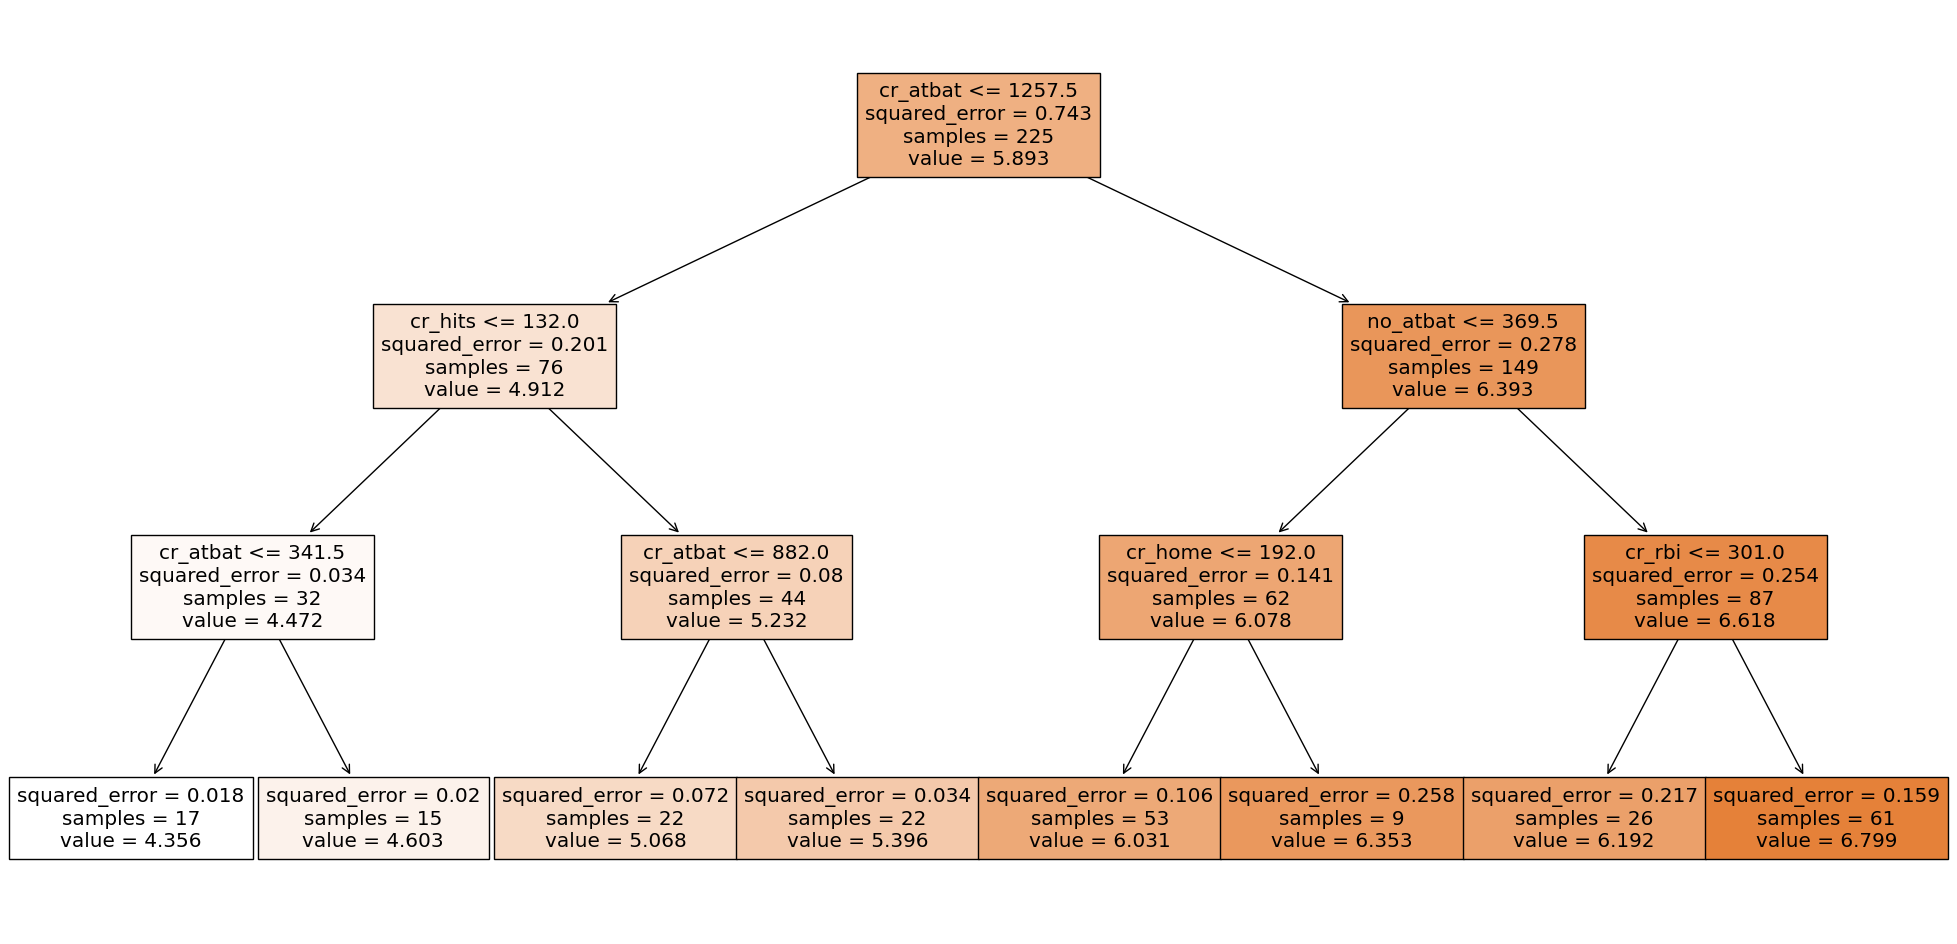

In [81]:
# Visualize the regression tree
X = df.drop(['logsalar'],axis=1)
fn= X.columns

fig = plt.figure(figsize=(25,12))
_ = tree.plot_tree(best_rt_model, feature_names = fn, filled = True)

## Post Pruning RT

In [82]:
path=best_rt_model.cost_complexity_pruning_path(X_train, y_train)

#path variable gives two things: ccp_alphas and impurities
ccp_alphas,impurities=path.ccp_alphas,path.impurities

print("ccp alpha wil give list of values :",ccp_alphas)
print("***********************************************************")
print("Impurities in Regression Tree :", impurities)

ccp alpha wil give list of values : [0.         0.00215114 0.00353819 0.00525654 0.02984124 0.04686352
 0.04757581 0.49092383]
***********************************************************
Impurities in Regression Tree : [0.11657906 0.1187302  0.12226839 0.12752493 0.15736618 0.2042297
 0.25180551 0.74272934]


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

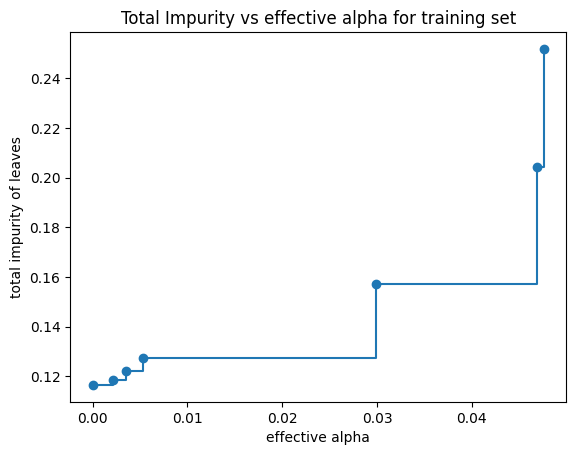

In [83]:
# plot effective alphas
fig, ax = plt.subplots()
# the maximum effecive alpha is removed as it is a tree with only one node. 
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [84]:
# let's retrain Best RT model using the effective alphas
rts = [] # list that store all the models
for ccp_alpha in ccp_alphas:
    rt = DecisionTreeRegressor(random_state=666, ccp_alpha=ccp_alpha)
    rt.fit(X_train, y_train)
    rts.append(rt)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        rts[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.4909238334905075


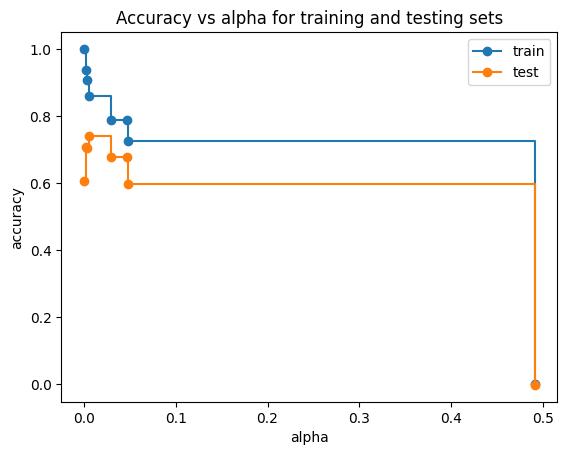

In [85]:
# let's visualize the accuracy score for train and test
rt_train_scores = [rt.score(X_train, y_train) for rt in rts]
rt_test_scores = [rt.score(X_test, y_test) for rt in rts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, rt_train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, rt_test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show() 

In [86]:
# let's put the scores in a table
rt_ccp_alpha_table = pd.DataFrame()
rt_ccp_alpha_table['train_score'] = rt_train_scores
rt_ccp_alpha_table['test_score'] = rt_test_scores
rt_ccp_alpha_table['ccp_alpha'] = ccp_alphas
rt_ccp_alpha_table.sort_values(by='test_score', ascending = False)

# 3 is optimal

,train_score,test_score,ccp_alpha
3,8.603299e-01,0.741811,0.005257
1,9.379163e-01,0.708953,0.002151
2,9.078455e-01,0.705492,0.003538
4,7.881245e-01,0.678232,0.029841
5,7.881245e-01,0.678232,0.046864
0,1.000000e+00,0.605712,0.000000
6,7.250281e-01,0.596705,0.047576
7,-2.220446e-16,-0.001695,0.490924


In [87]:
rt_ccp_alpha_table.sort_values(by='test_score'+'', ascending = False)

,train_score,test_score,ccp_alpha
3,8.603299e-01,0.741811,0.005257
1,9.379163e-01,0.708953,0.002151
2,9.078455e-01,0.705492,0.003538
4,7.881245e-01,0.678232,0.029841
5,7.881245e-01,0.678232,0.046864
0,1.000000e+00,0.605712,0.000000
6,7.250281e-01,0.596705,0.047576
7,-2.220446e-16,-0.001695,0.490924


In [88]:
# Let's add Alpha = 0.005257 to post-prune our regression tree
rt_post = DecisionTreeRegressor(random_state=666, ccp_alpha = 0.005257)

rt_post.fit (X_train, y_train)

y_pred_post_rt = rt_post.predict(X_test)

print(rt_post.score (X_test, y_test)) 

0.7418112994940648


In [99]:
# Compare with the best model
index_best_model = np.argmax(rt_test_scores)
best_model = rts[index_best_model]

r2_train_best_model = best_model.score(X_train, y_train)
r2_test_best_model = best_model.score(X_test, y_test)

print('R² of Decision Tree Regressor on training set: {:.3f}'.format(r2_train_best_model))
print('R² of Decision Tree Regressor on test set: {:.3f}'.format(r2_test_best_model))

# Print MSE
mse_post_rt = mean_squared_error(y_test, y_pred_post_rt)
print("Mean Squared Error:", mse_post_rt)

R² of Decision Tree Regressor on training set: 0.860
R² of Decision Tree Regressor on test set: 0.742
Mean Squared Error: 0.19642841734609168


### Random Forest Regression

In [90]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=666)
rf_model = rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf =  rf_model.predict(X_test)

# Print r-squared
r2_train_rf = rf_model.score(X_train, y_train)
r2_test_rf = rf_model.score(X_test, y_test)
print('R² of Random Forest Regressor on training set: {:.3f}'.format(r2_train_rf))
print('R² of Random Forest Regressor on test set: {:.3f}'.format(r2_test_rf))

# Print MSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error:", mse_rf)

R² of Random Forest Regressor on training set: 0.974
R² of Random Forest Regressor on test set: 0.783
Mean Squared Error: 0.1650833738285435


In [91]:
# Define the parameter grid for Random Search
param_grid = {
    'n_estimators': randint(100, 1000),         # Randomly select a value between 100 and 1000 for n_estimators
    'max_depth': randint(1, 10),                 # Randomly select a value between 1 and 10 for max_depth
    'min_samples_split': randint(2, 20),         # Randomly select a value between 2 and 20 for min_samples_split
    'min_samples_leaf': randint(1, 10),          # Randomly select a value between 1 and 10 for min_samples_leaf
    'max_features': ['auto', 'sqrt']             # Randomly select either 'auto' or 'sqrt' for max_features
}

# Initialize the Random Forest Regressor model
model = RandomForestRegressor()

# Perform random search with cross-validation
random_search = RandomizedSearchCV(scoring='neg_mean_squared_error', estimator=model, param_distributions=param_grid, n_iter=10, cv=5, random_state=666)
random_search.fit(X_train, y_train)  # Fit the random search to the training data

# Print the rf best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 16, 'n_estimators': 837}
Best Score: -0.13361964274326868


In [92]:
# Create the decision tree classifier model
best_rf_model = RandomForestRegressor(random_state=666, **random_search.best_params_)

# Train the model
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best_rf = best_rf_model.predict(X_test)

# Print r-squared
r2_train_best_rf = best_rf_model.score(X_train, y_train)
r2_test_best_rf = best_rf_model.score(X_test, y_test)
print('R² of Best Random Forest Regressor on training set: {:.3f}'.format(r2_train_best_rf))
print('R² of Best Random Forest Regressor on test set: {:.3f}'.format(r2_test_best_rf))

# Print MSE
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
print("Mean Squared Error:", mse_best_rf)

R² of Best Random Forest Regressor on training set: 0.891
R² of Best Random Forest Regressor on test set: 0.791
Mean Squared Error: 0.15914212501465416


### Gradient Boosting Regression

In [93]:
gb_model = GradientBoostingRegressor(random_state=666)
gb_model = gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb =  gb_model.predict(X_test)

# Print r-squared
r2_train_gb = gb_model.score(X_train, y_train)
r2_test_gb = gb_model.score(X_test, y_test)
print('R² of Gradient Boosting Regressor on training set: {:.3f}'.format(r2_train_gb))
print('R² of Gradient Boosting Regressor on test set: {:.3f}'.format(r2_test_gb))

# Print MSE
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Mean Squared Error:", mse_gb)

R² of Gradient Boosting Regressor on training set: 0.986
R² of Gradient Boosting Regressor on test set: 0.800
Mean Squared Error: 0.1525234260017977


In [94]:
# Define the parameter grid for random search
param_grid = {
    'n_estimators': randint(100, 1000),         # Randomly select a value between 100 and 1000 for n_estimators
    'learning_rate': uniform(0.01, 0.5),         # Randomly select a value between 0.01 and 0.5 for learning_rate
    'max_depth': randint(1, 10),                 # Randomly select a value between 1 and 10 for max_depth
    'min_samples_split': randint(2, 20),         # Randomly select a value between 2 and 20 for min_samples_split
    'min_samples_leaf': randint(1, 10),          # Randomly select a value between 1 and 10 for min_samples_leaf
    'max_features': ['auto', 'sqrt']             # Randomly select either 'auto' or 'sqrt' for max_features
}

# Initialize the Gradient Boosting Regressor model
model = GradientBoostingRegressor()

# Perform random search with cross-validation
random_search = RandomizedSearchCV(scoring='neg_mean_squared_error', estimator=model, param_distributions=param_grid, n_iter=10, cv=5, random_state=666)
random_search.fit(X_train, y_train)  # Fit the random search onto the training data

# Print the best parameters and best score
print("Gradient Boosting Best Parameters:", random_search.best_params_)
print("Gradient Boosting Best Score:", random_search.best_score_)

Gradient Boosting Best Parameters: {'learning_rate': 0.04967106342701682, 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 13, 'n_estimators': 922}
Gradient Boosting Best Score: -0.13997780563334605


In [95]:
best_gb_model = GradientBoostingRegressor(random_state=666, **random_search.best_params_)
best_gb_model = gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best_gb =  best_gb_model.predict(X_test)

# Print r-squared
r2_train_best_gb = best_gb_model.score(X_train, y_train)
r2_test_best_gb = best_gb_model.score(X_test, y_test)
print('R² of Gradient Boosting Regressor on training set: {:.3f}'.format(r2_train_best_gb))
print('R² of Gradient Boosting Regressor on test set: {:.3f}'.format(r2_test_best_gb))

# Print MSE
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
print("Mean Squared Error:", mse_best_gb)

R² of Gradient Boosting Regressor on training set: 0.986
R² of Gradient Boosting Regressor on test set: 0.800
Mean Squared Error: 0.1525234260017977


### Ada Boost Regression

In [96]:
ab_model = AdaBoostRegressor(random_state=666)
ab_model = ab_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ab =  ab_model.predict(X_test)

# Print r-squared
r2_train_ab = ab_model.score(X_train, y_train)
r2_test_ab = ab_model.score(X_test, y_test)
print('R² of Ada Boost Regressor on training set: {:.3f}'.format(r2_train_ab))
print('R² of Ada Boost Regressor on test set: {:.3f}'.format(r2_test_ab))

# Print MSE
mse_ab = mean_squared_error(y_test, y_pred_ab)
print("Mean Squared Error:", mse_ab)

R² of Ada Boost Regressor on training set: 0.917
R² of Ada Boost Regressor on test set: 0.764
Mean Squared Error: 0.17949744161955233


In [97]:
# Set the parameter grid for random search
param_grid = {
    'n_estimators': randint(100, 1000),         # Randomly select a value between 100 and 1000 for n_estimators
    'learning_rate': uniform(0.01, 0.5),         # Randomly select a value between 0.01 and 0.5 for learning_rate
    'loss': ['linear', 'square', 'exponential']  # Randomly select one of the specified values for loss function
}

# Initialize the AdaBoost Regressor model
model = AdaBoostRegressor()

# Perform random search with cross-validation
random_search = RandomizedSearchCV(scoring='neg_mean_squared_error', estimator=model, param_distributions=param_grid, n_iter=10, cv=5, random_state=666)
random_search.fit(X_train, y_train)  # Fit to the training data to get the best Ada Boost Parameters

# Print the best Ada Boost parameters and best score
print("Ada Boost Best Parameters:", random_search.best_params_)
print("Ada Boost Best Score:", random_search.best_score_)

Ada Boost Best Parameters: {'learning_rate': 0.01255441938189993, 'loss': 'linear', 'n_estimators': 724}
Ada Boost Best Score: -0.15169946699034006


In [98]:
best_ab_model = AdaBoostRegressor(random_state=666, **random_search.best_params_)
best_ab_model = best_ab_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best_ab =  best_ab_model.predict(X_test)

# Print r-squared
r2_train_best_ab = best_ab_model.score(X_train, y_train)
r2_test_best_ab = best_ab_model.score(X_test, y_test)
print('R² of Ada Boost Regressor on training set: {:.3f}'.format(r2_train_best_ab))
print('R² of Ada Boost Regressor on test set: {:.3f}'.format(r2_test_best_ab))

# Print MSE
mse_best_ab = mean_squared_error(y_test, y_pred_best_ab)
print("Mean Squared Error:", mse_best_ab)

R² of Ada Boost Regressor on training set: 0.898
R² of Ada Boost Regressor on test set: 0.754
Mean Squared Error: 0.1871395041649171
